---


#PROYECTO FINAL: CLASIFICACION DE IMAGENES 


**EGUIVAR VILLCA SHIRLEY CARMINIA**


---



In [46]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
import numpy as np
from sklearn import metrics
import time

In [30]:
from keras.datasets import cifar10

##Loading & preparing CIFAR-10 data

---


In [31]:
# Load CIFAR-10 data 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

##Determine shape of the data


---


El siguiente paso es determinar la forma de una muestra. Keras requiere esto para comprender qué datos puede esperar en la INPUT LAYER de su red neuronal.

In [32]:
print("Shape of train_X: {}".format(train_X.shape))
print("Shape of train_Y: {}".format(train_Y.shape))
print()
print("Shape of test_X: {}".format(test_X.shape))
print("Shape of test_Y: {}".format(test_Y.shape))

Shape of train_X: (50000, 32, 32, 3)
Shape of train_Y: (50000, 1)

Shape of test_X: (10000, 32, 32, 3)
Shape of test_Y: (10000, 1)


Image (#2702): Which is label number '[2]', or label 'bird''


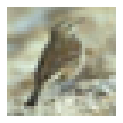

In [33]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
sample = 2702 
each = train_X[sample]

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(each, interpolation='nearest')
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,train_Y[sample], labelNames[train_Y[sample][0]]))

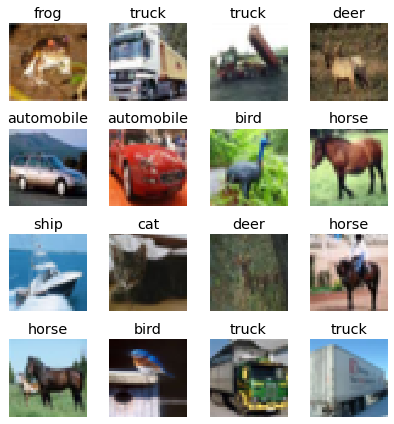

In [34]:
ROW = 4
COLUMN = 4
plt.figure(figsize=(6, 6)) 
for i in range(ROW * COLUMN):
    image = train_X[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow((image).astype(np.uint8), interpolation='nearest')  
    plt.title('{}'.format(labelNames[train_Y[i][0]]))
    #plt.title('label {}'.format(labelNames[train_Y[i][0]]))
    #plt.imshow((out * 255).astype(np.uint8))
    plt.axis('off')
    plt.tight_layout()   
    
plt.show()


##Data Procesing

---

Convertimos la data en el formato float32 , esto deberia acelerar el training. Luego normalizamos la data , n el rango [−1,1] 

In [35]:
# Checking the minimum and maximum values of x_train
print(train_X.min())
print(train_X.max())

# Parse numbers as floats
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
# Normalize data 
## the max value is 255, that is the reason why we divide with that num
train_X=train_X/255.0
test_X=test_X/255.0

0
255


In [36]:
x_train_flat = train_X.reshape(train_X.shape[0], train_X.shape[1]* train_X.shape[2]* train_X.shape[3])
x_test_flat = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2] * test_X.shape[3])
print(x_train_flat.shape)
print(x_test_flat.shape)
# Estamos cambiando la forma por que   nos da error si no lo hacemos 4dim max 2
#train_X = train_X.reshape(50000,32*32*3)
#test_X = test_X.reshape(10000,32*32*3)


(50000, 3072)
(10000, 3072)


In [37]:
print(train_X.shape)
print(test_X.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [38]:
# El Y tambien tiene que cambiar de forma
train_Y = train_Y.reshape(train_Y.shape[0], )
test_Y = test_Y.reshape(test_Y.shape[0], )
print(train_Y.shape)
print(test_Y.shape)

(50000,)
(10000,)


##Building/Train the Model  - KNN

---



In [59]:
from sklearn.neighbors import KNeighborsClassifier
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_flat, train_Y)
knn_pred_y = knn.predict(x_test_flat)

end2 = time.time()
knn_time = end2-start2

##Building/Train the Model  - Decision Tree

---


In [58]:
from sklearn.tree import DecisionTreeClassifier
start2 = time.time()

tree = DecisionTreeClassifier(max_depth=200, criterion='entropy')
tree.fit(x_train_flat, train_Y)
tree_pred_y = tree.predict(x_test_flat)

end2 = time.time()
tree_time = end2-start2


##Building/Train the Model  - SVM

---



In [ ]:
#tarda demasiado
from sklearn.svm import SVC
start1 = time.time()
svm = SVC(C=1, kernel='linear', gamma="auto")
svm.fit(x_train_flat, train_Y)
svm_pred_y = svm.predict(x_test_flat)
end1 = time.time()
svm_time = end1-start1

##Generating evaluation metrics 

---


In [50]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Metrics KNN

---



-----------------KNN Summary---------------
KNN Time: 1.58 minute
F1 score: 0.3260170986061005
Accuracy score: 0.3398
Confusion matrix: 
 [[537   4 117  13  59   7  26   5 225   7]
 [139 205 110  42 155  36  61  10 217  25]
 [107   3 452  52 226  34  66   8  49   3]
 [ 70   8 234 217 193 115  95  17  46   5]
 [ 64   1 262  35 514  21  41   7  53   2]
 [ 71   3 227 155 187 220  66  14  51   6]
 [ 27   2 273  68 314  37 248   2  28   1]
 [ 93  10 181  50 280  52  53 210  67   4]
 [141  14  52  38  54  16  14   8 655   8]
 [153  67  98  68 124  23  46  29 252 140]]
Plotting confusion matrix


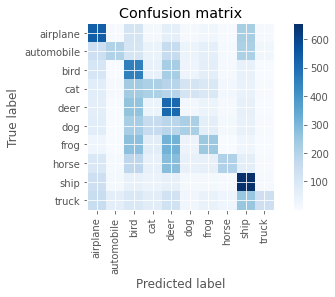

              precision    recall  f1-score   support

           0       0.38      0.54      0.45      1000
           1       0.65      0.20      0.31      1000
           2       0.23      0.45      0.30      1000
           3       0.29      0.22      0.25      1000
           4       0.24      0.51      0.33      1000
           5       0.39      0.22      0.28      1000
           6       0.35      0.25      0.29      1000
           7       0.68      0.21      0.32      1000
           8       0.40      0.66      0.50      1000
           9       0.70      0.14      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



In [51]:
# KNN report and analysis
#y_pred_svc = svc.predict(test_Y)
import numpy as np
#yPred = np.argmax(knn_pred_y, axis=1)  ## para corrergir el error del MIX 
yPred = knn_pred_y
#yTest =np.argmax(test_Y, axis=1)
yTest = test_Y
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
knn_f1 = metrics.f1_score(yTest, yPred, average= "weighted")
knn_accuracy = metrics.accuracy_score(yTest, yPred)
knn_cm = metrics.confusion_matrix(yTest, yPred)
print("-----------------KNN Summary---------------")
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(yTest, yPred))

##Metrics Decision Tree

---



-----------------Decision Tree Summary---------------
Tree Time: 7.83 minute
F1 score: 0.26109886722237236
Accuracy score: 0.2611
Confusion matrix: 
 [[352  49 102  61  66  50  33  50 155  82]
 [ 80 283  54  67  48  54  65  73 118 158]
 [ 97  46 210 104 149 104 107  85  38  60]
 [ 58  56 120 152  84 157 137 115  51  70]
 [ 55  46 148 111 202  90 155 113  34  46]
 [ 55  53 108 160  87 228  88 110  55  56]
 [ 36  60 141 117 127 108 269  61  32  49]
 [ 63  66 104 100 114  83  70 259  56  85]
 [141  94  63  51  57  45  22  52 372 103]
 [ 86 176  54  57  42  54  54  80 113 284]]
Plotting confusion matrix


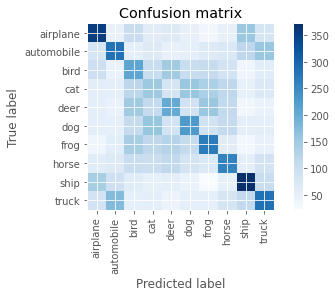

              precision    recall  f1-score   support

           0       0.34      0.35      0.35      1000
           1       0.30      0.28      0.29      1000
           2       0.19      0.21      0.20      1000
           3       0.16      0.15      0.15      1000
           4       0.21      0.20      0.20      1000
           5       0.23      0.23      0.23      1000
           6       0.27      0.27      0.27      1000
           7       0.26      0.26      0.26      1000
           8       0.36      0.37      0.37      1000
           9       0.29      0.28      0.28      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000



In [57]:
# Tree report and analysis
#y_pred_svc = tree.predict(test_Y)
import numpy as np
#yPred = np.argmax(knn_pred_y, axis=1)  ## para corrergir el error del MIX 
yPred = tree_pred_y
#yTest =np.argmax(test_Y, axis=1)
yTest = test_Y
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
tree_f1 = metrics.f1_score(yTest, yPred, average= "weighted")
tree_accuracy = metrics.accuracy_score(yTest, yPred)
tree_cm = metrics.confusion_matrix(yTest, yPred)
print("-----------------Decision Tree Summary---------------")
print("Tree Time: {:0.2f} minute".format(tree_time/60.0))
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(yTest, yPred))

#Metrics SVM

##Conclusion

---

## Tests examples


---


In [ ]:
import numpy as np 
from keras.preprocessing import image
# Give the link of the image here to test 
test_image =image.load_img('0032.png',target_size =(32,32))
import matplotlib.pyplot as plt 
plt.imshow(test_image)

In [42]:
test_image =image.img_to_array(test_image) 
test_image =np.expand_dims(test_image, axis =0) 
result = knn.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Airplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')
#%matplotlib inline 
#import matplotlib.pyplot as plt 
#plt.imshow(test_image)

AttributeError: ignored